In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | evensk
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | amderma
City not found. Skipping...
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | tongchuan
Processing Record 11 of Set 1 | nerchinskiy zavod
Processing Record 12 of Set 1 | hauterive
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | adre
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | cochrane
Processing Record 17 of Set 1 | ozoir-la-ferriere
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 

Processing Record 37 of Set 4 | vardo
Processing Record 38 of Set 4 | nuuk
Processing Record 39 of Set 4 | mount isa
Processing Record 40 of Set 4 | tuktoyaktuk
Processing Record 41 of Set 4 | roma
Processing Record 42 of Set 4 | muli
Processing Record 43 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 44 of Set 4 | ambodifototra
City not found. Skipping...
Processing Record 45 of Set 4 | castro
Processing Record 46 of Set 4 | gombong
Processing Record 47 of Set 4 | ust-tsilma
Processing Record 48 of Set 4 | beringovskiy
Processing Record 49 of Set 4 | marzuq
Processing Record 50 of Set 4 | taltal
Processing Record 1 of Set 5 | kodar
Processing Record 2 of Set 5 | yerbogachen
Processing Record 3 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 5 | omboue
Processing Record 5 of Set 5 | adrar
Processing Record 6 of Set 5 | concepcion del uruguay
Processing Record 7 of Set 5 | ozinki
Processing Record 8 of Set 5 | rawson
Processing Record 

Processing Record 26 of Set 8 | hirara
Processing Record 27 of Set 8 | iqaluit
Processing Record 28 of Set 8 | north platte
Processing Record 29 of Set 8 | malwan
City not found. Skipping...
Processing Record 30 of Set 8 | lagoa
Processing Record 31 of Set 8 | krasnyy
Processing Record 32 of Set 8 | kismayo
Processing Record 33 of Set 8 | san jeronimo
Processing Record 34 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 35 of Set 8 | saint albans
Processing Record 36 of Set 8 | dera din panah
City not found. Skipping...
Processing Record 37 of Set 8 | antalaha
Processing Record 38 of Set 8 | puerto narino
Processing Record 39 of Set 8 | davila
Processing Record 40 of Set 8 | putla
City not found. Skipping...
Processing Record 41 of Set 8 | lima
Processing Record 42 of Set 8 | makakilo city
Processing Record 43 of Set 8 | sioux lookout
Processing Record 44 of Set 8 | nicoya
Processing Record 45 of Set 8 | terrak
Processing Record 46 of Set 8 | elko
Processing Record 47 

Processing Record 9 of Set 12 | bambous virieux
Processing Record 10 of Set 12 | boulder
Processing Record 11 of Set 12 | linguere
Processing Record 12 of Set 12 | rey bouba
Processing Record 13 of Set 12 | snezhnogorsk
Processing Record 14 of Set 12 | spornoye
Processing Record 15 of Set 12 | sainte-anne-des-monts
Processing Record 16 of Set 12 | marcona
City not found. Skipping...
Processing Record 17 of Set 12 | sur
Processing Record 18 of Set 12 | jand
Processing Record 19 of Set 12 | gdov
Processing Record 20 of Set 12 | pacific grove
Processing Record 21 of Set 12 | smolenka
Processing Record 22 of Set 12 | tremembe
Processing Record 23 of Set 12 | esil
Processing Record 24 of Set 12 | bac lieu
Processing Record 25 of Set 12 | burnie
Processing Record 26 of Set 12 | samarai
Processing Record 27 of Set 12 | eskasem
City not found. Skipping...
Processing Record 28 of Set 12 | sinnamary
Processing Record 29 of Set 12 | trelew
Processing Record 30 of Set 12 | ahuimanu
Processing Reco

In [12]:
len(city_data)

555

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Evensk,61.9500,159.2333,0.19,67,78,11.30,RU,2022-02-14 18:17:20
1,Hobart,-42.8794,147.3294,61.02,93,100,9.22,AU,2022-02-14 18:17:20
2,Rikitea,-23.1203,-134.9692,78.24,68,63,9.71,PF,2022-02-14 18:15:34
3,Kodiak,57.7900,-152.4072,36.91,81,100,16.11,US,2022-02-14 18:17:21
4,Bluff,-46.6000,168.3333,48.79,89,100,10.47,NZ,2022-02-14 18:17:21
5,Port Alfred,-33.5906,26.8910,70.20,77,100,22.77,ZA,2022-02-14 18:15:33
6,Tongchuan,35.0806,109.0897,35.20,65,29,2.44,CN,2022-02-14 18:17:22
7,Nerchinskiy Zavod,51.3088,119.6100,-18.18,100,99,2.66,RU,2022-02-14 18:17:23
8,Hauterive,46.0901,3.4459,47.16,83,99,8.32,FR,2022-02-14 18:17:23
9,Adre,13.4667,22.2000,76.48,15,6,9.51,TD,2022-02-14 18:17:24


In [19]:
df2 = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
df2.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Evensk,RU,2022-02-14 18:17:20,61.9500,159.2333,0.19,67,78,11.30
1,Hobart,AU,2022-02-14 18:17:20,-42.8794,147.3294,61.02,93,100,9.22
2,Rikitea,PF,2022-02-14 18:15:34,-23.1203,-134.9692,78.24,68,63,9.71
3,Kodiak,US,2022-02-14 18:17:21,57.7900,-152.4072,36.91,81,100,16.11
4,Bluff,NZ,2022-02-14 18:17:21,-46.6000,168.3333,48.79,89,100,10.47
5,Port Alfred,ZA,2022-02-14 18:15:33,-33.5906,26.8910,70.20,77,100,22.77
6,Tongchuan,CN,2022-02-14 18:17:22,35.0806,109.0897,35.20,65,29,2.44
7,Nerchinskiy Zavod,RU,2022-02-14 18:17:23,51.3088,119.6100,-18.18,100,99,2.66
8,Hauterive,FR,2022-02-14 18:17:23,46.0901,3.4459,47.16,83,99,8.32
9,Adre,TD,2022-02-14 18:17:24,13.4667,22.2000,76.48,15,6,9.51


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

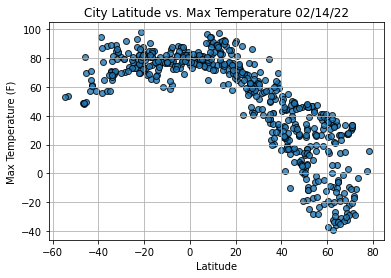

In [22]:
%matplotlib inline
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

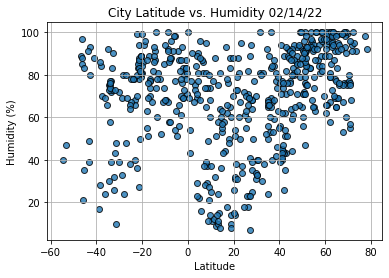

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

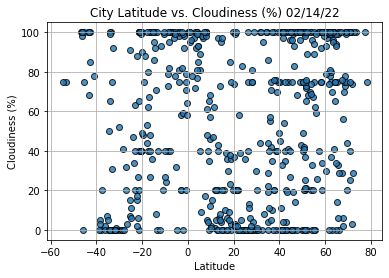

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

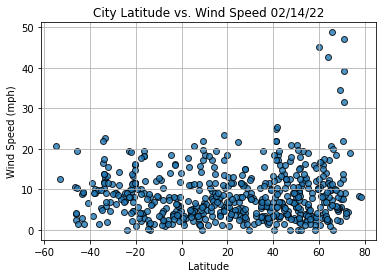

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()